In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.ticker as ticker
import pandas as pd
import numpy as np
from statsmodels.stats.anova import AnovaRM
from scipy.stats import ttest_1samp, ttest_ind, t, sem
import statsmodels.stats.api as sms
import glob
import os

In [2]:
### Path to data
exp1_path = '../data/Exp 1/data/cleaned/'
exp2a_path = '../data/Exp 2a/data/cleaned/'
exp2b_path = '../data/Exp 2b/data/cleaned/'
excluded_files = pd.read_csv('../data/excluded_files_cleaned.csv')['f_name'].drop_duplicates().to_list()

In [3]:
# Compute Standard Errors for within-subject conditions
def within_subj_SE(D):
    D = D.to_numpy()
    D_norm = D - D.mean(axis=1, keepdims=True) + D.mean()
    return sem(D_norm, axis=0)

In [4]:
def corr_RT(df, index_range=None):
    within_corr = 0
    within_count = 0
    within_RT = 0
    between_corr = 0
    between_count = 0
    between_RT = 0
    item_a = df['item_a'].dropna().to_list()
    item_b = df['item_b'].dropna().to_list()
    corr = df['key_resp_2.corr'].to_numpy()
    rt = df['key_resp_2.rt'].to_numpy()[np.logical_not(np.isnan(corr))]
    corr = corr[np.logical_not(np.isnan(corr))]
    df = df[['pictures', 'segment']].dropna()
    if index_range is None:
        index_range = range(len(item_a))
    for n in index_range:
        item_a_seg = df.loc[df['pictures']==item_a[n]]['segment'].to_list()[0]
        item_b_seg = df.loc[df['pictures']==item_b[n]]['segment'].to_list()[0]
        if item_a_seg == item_b_seg:
            within_count += 1
            within_corr  += corr[n]
            if (corr[n]):
                within_RT += rt[n]
        else:
            between_count += 1 
            between_corr += corr[n]
            if (corr[n]):
                between_RT += rt[n]

    return within_corr/within_count, between_corr/between_count, within_RT/within_corr, between_RT/between_corr

In [11]:
def segment_classification(file):
    f_name = os.path.basename(file)
    task = f_name.split('_')[1]
    first = task.split('W')[0].replace('task-', '')
    second = task.split('W')[1].replace('.csv', '')
    conds = {}
    df = pd.read_csv(file)
    conds[first] = corr_RT(df, range(36))
    conds[second] = corr_RT(df, range(36,72))
    return conds

In [17]:
exp1_data = sorted(glob.glob(exp1_path + '*.csv'))
noclock_within = []
noclock_between = []
clock_within = []
clock_between = []

noclock_within_RT = []
noclock_between_RT = []
clock_within_RT = []
clock_between_RT = []
subjects = []
for file in exp1_data:
    if file not in excluded_files:
        sub = os.path.basename(file).split('_')[0]
        subjects.append(sub)
        conds = segment_classification(file) 
        noclock_within.append(conds['noclock'][0])
        noclock_between.append(conds['noclock'][1])
        noclock_within_RT.append(conds['noclock'][2])
        noclock_between_RT.append(conds['noclock'][3])
        clock_within.append(conds['clock'][0])
        clock_between.append(conds['clock'][1])
        clock_within_RT.append(conds['clock'][2])
        clock_between_RT.append(conds['clock'][3])
exp1_results_df = pd.DataFrame({'subject':subjects, 'noclock_within':noclock_within, 'noclock_between':noclock_between, 'clock_within':clock_within, 'clock_between':clock_between, \
    'noclock_within_RT':noclock_within_RT, 'noclock_between_RT':noclock_between_RT, 'clock_within_RT':clock_within_RT, 'clock_between_RT':clock_between_RT})
exp1_results_df.to_csv('exp1_results_withRT.csv')

In [19]:
exp2a_data = sorted(glob.glob(exp2a_path+'*.csv'))
background_within = []
background_between = []
background_within_RT = []
background_between_RT = []
nback_within = []
nback_between = []
nback_within_RT = []
nback_between_RT = []
subjects = []
for file in exp2a_data:
    if file not in excluded_files:
        sub = os.path.basename(file).split('_')[0]
        subjects.append(sub)
        if 'task-background' in file:
            df = pd.read_csv(file)
            within, between, within_RT, between_RT = corr_RT(df)
            background_within.append(within)
            background_between.append(between)
            background_within_RT.append(within_RT)
            background_between_RT.append(between_RT)
            nback_within.append(np.nan)
            nback_between.append(np.nan)
            nback_within_RT.append(np.nan)
            nback_between_RT.append(np.nan)
        else:
            df = pd.read_csv(file)
            within, between, within_RT, between_RT = corr_RT(df)
            nback_within.append(within)
            nback_between.append(between)
            nback_within_RT.append(within_RT)
            nback_between_RT.append(between_RT)
            background_within.append(np.nan)
            background_between.append(np.nan)
            background_within_RT.append(np.nan)
            background_between_RT.append(np.nan)
exp2a_results_df = pd.DataFrame({'subject':subjects, 'background_within':background_within, 'background_between':background_between, 'nback_within':nback_within, 'nback_between':nback_between, \
    'background_within_RT':background_within_RT, 'background_between_RT':background_between_RT, 'nback_within_RT':nback_within_RT, 'nback_between_RT':nback_between_RT})
exp2a_results_df.to_csv('exp2a_results_withRT.csv')

In [20]:
exp2b_data = sorted(glob.glob(exp2b_path+'*.csv'))
background_within = []
background_between = []
background_within_RT = []
background_between_RT = []
nback_within = []
nback_between = []
nback_within_RT = []
nback_between_RT = []
subjects = []
for file in exp2b_data:
    if file not in excluded_files:
        sub = os.path.basename(file).split('_')[0]
        subjects.append(sub)

        df = pd.read_csv(file)
        start_index = df.index[df['key_resp_23.rt'] > 0][0]
        df = df[start_index:]

        if 'task-background' in file:
            within, between, within_RT, between_RT = corr_RT(df)
            background_within.append(within)
            background_between.append(between)
            background_within_RT.append(within_RT)
            background_between_RT.append(between_RT)
            nback_within.append(np.nan)
            nback_between.append(np.nan)
            nback_within_RT.append(np.nan)
            nback_between_RT.append(np.nan)
        else:
            within, between, within_RT, between_RT = corr_RT(df)
            nback_within.append(within)
            nback_between.append(between)
            nback_within_RT.append(within_RT)
            nback_between_RT.append(between_RT)
            background_within.append(np.nan)
            background_between.append(np.nan)
            background_within_RT.append(np.nan)
            background_between_RT.append(np.nan)

exp2b_results_df = pd.DataFrame({'subject':subjects, 'background_within':background_within, 'background_between':background_between, 'nback_within':nback_within, 'nback_between':nback_between, \
    'background_within_RT':background_within_RT, 'background_between_RT':background_between_RT, 'nback_within_RT':nback_within_RT, 'nback_between_RT':nback_between_RT})
exp2b_results_df.to_csv('exp2b_results_withRT.csv')

# Experiment 1

In [18]:
# Load exp1 data
exp1 = pd.read_csv('exp1_results_withRT.csv')
exp1 = exp1.drop(columns=['Unnamed: 0'])

# Perform 2 t-tests on accuracy
print('N subj:', len(exp1.clock_within-exp1.clock_between))
print('Predictable:', ttest_1samp(exp1.clock_within-exp1.clock_between, 0))
print('Unpredictable:', ttest_1samp(exp1.noclock_within-exp1.noclock_between, 0))


# Test for difference between conditions (paired, since this is the same subjects)
print('Difference:', ttest_1samp((exp1.noclock_within-exp1.noclock_between)-(exp1.clock_within-exp1.clock_between), 0))

print('Conf int:')
wb = exp1.clock_within-exp1.clock_between
print('Predictable:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))
wb = exp1.noclock_within-exp1.noclock_between
print('Unpredictable:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))

N subj: 71
Predictable: Ttest_1sampResult(statistic=3.0231160189614865, pvalue=0.003494483374486835)
Unpredictable: Ttest_1sampResult(statistic=2.620113112439922, pvalue=0.0107715275095584)
Difference: Ttest_1sampResult(statistic=-0.606393763161595, pvalue=0.5462148952624495)
Conf int:
Predictable: (0.02556026779941871, 0.12467447398461885)
Unpredictable: (0.014387632226667384, 0.10611315024594606)


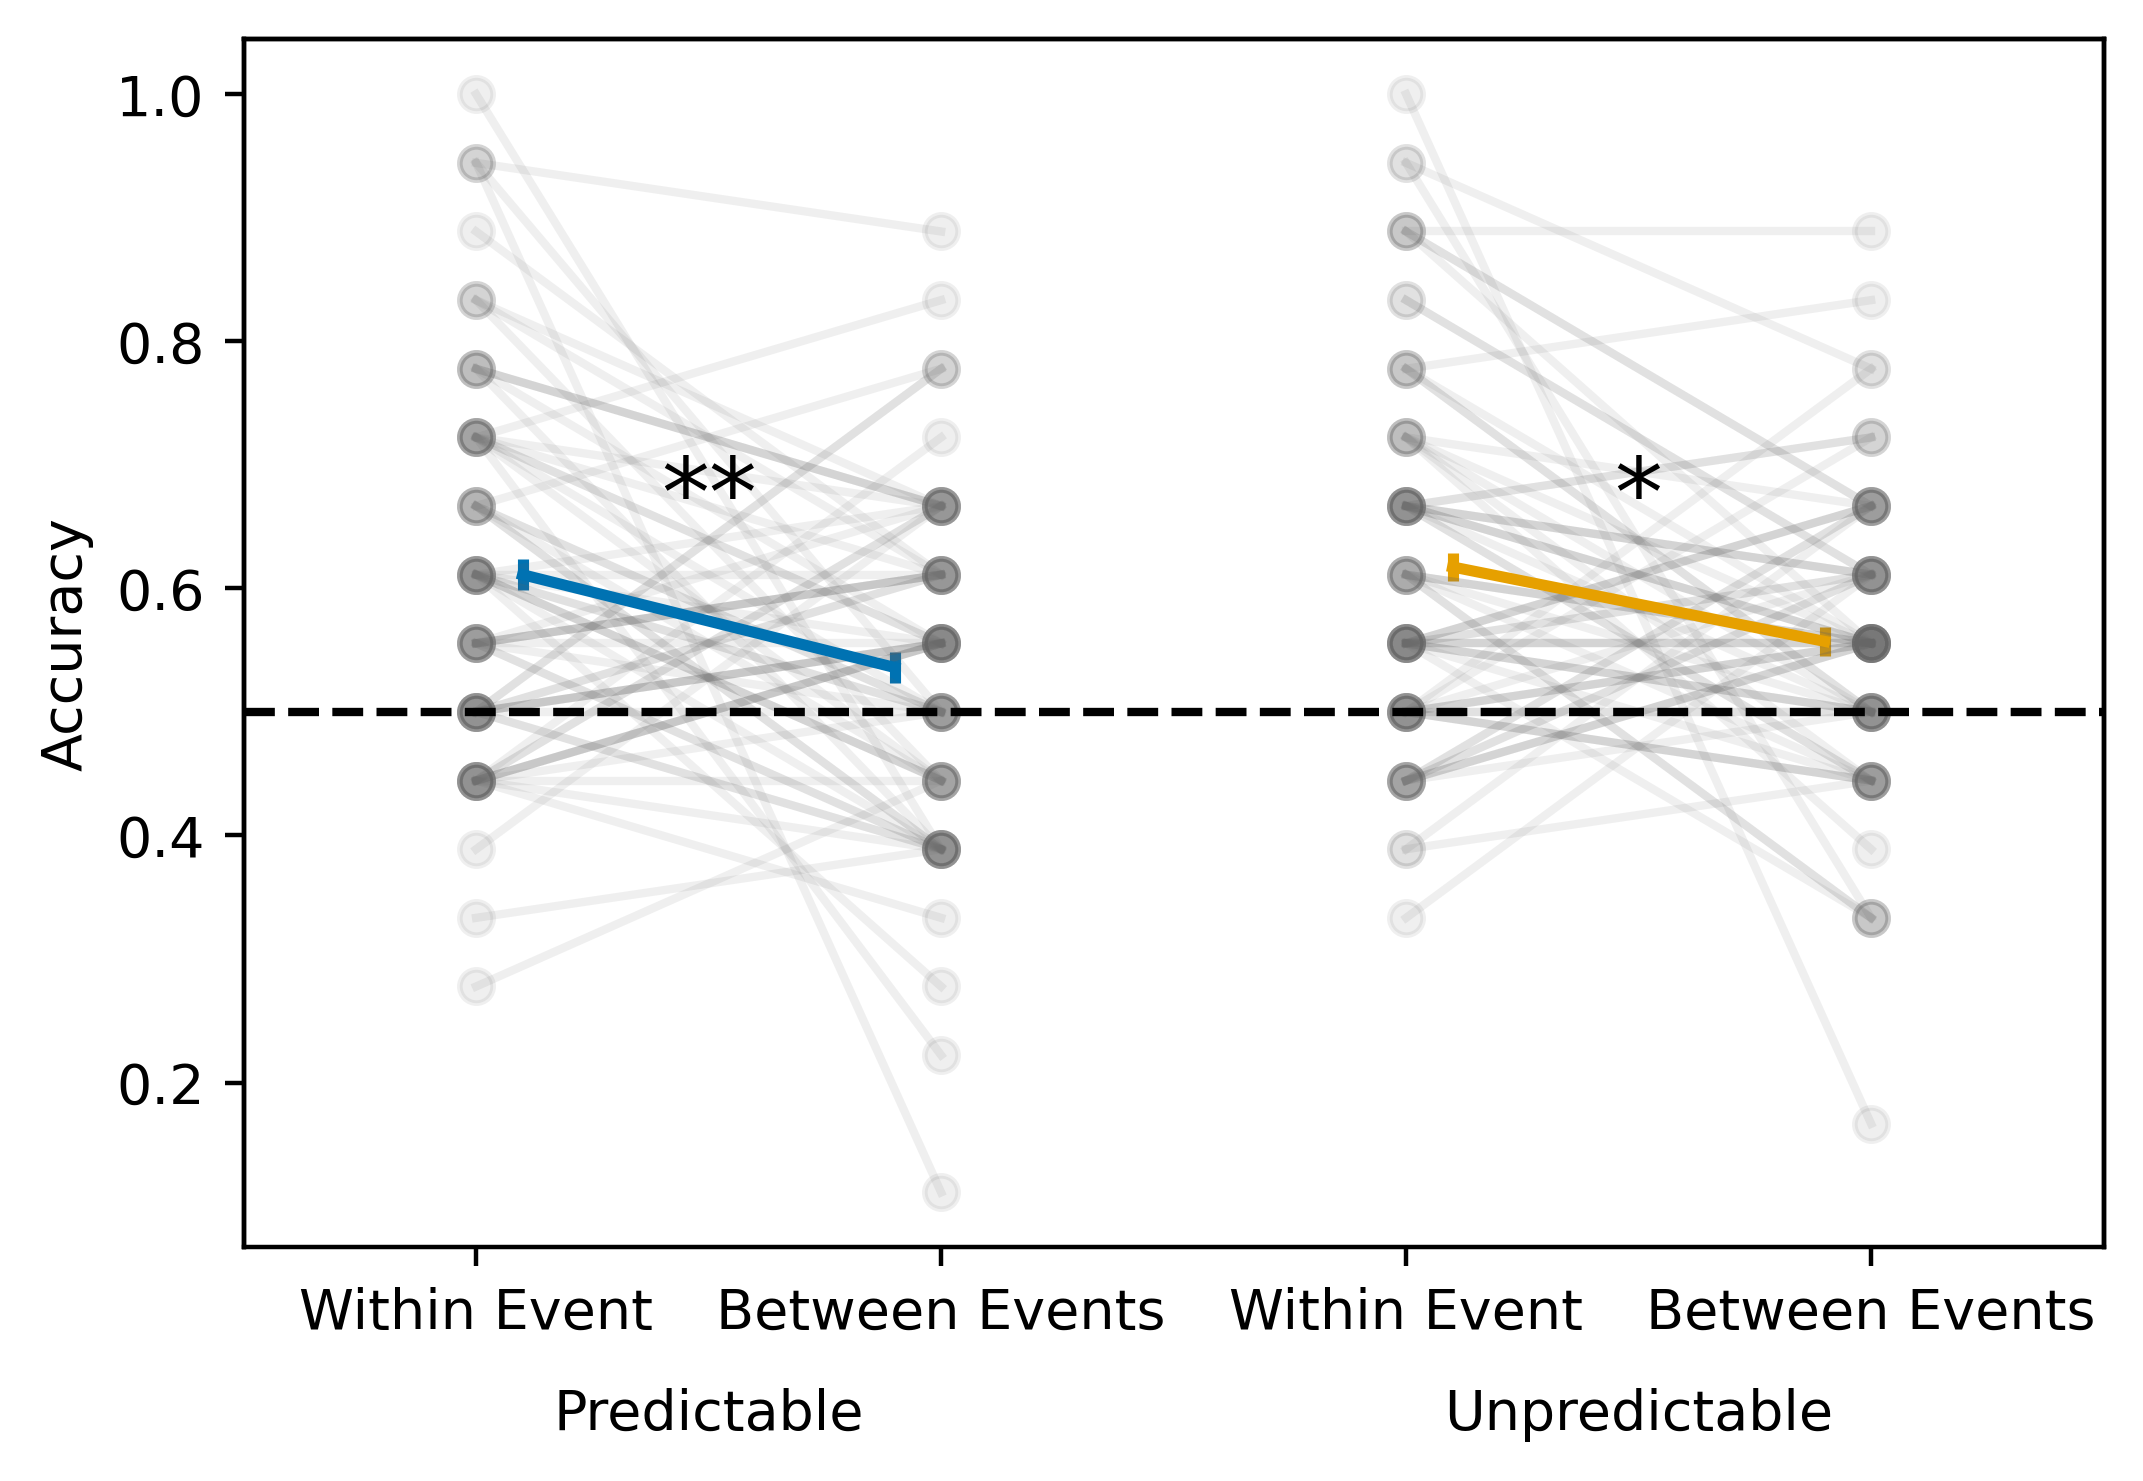

In [21]:
# Plot Exp1 subjects, with transparency=10%
plt.figure(dpi=400)
for subj in exp1.itertuples(index=False):
    plt.plot([0,1],[subj.clock_within, subj.clock_between], color=[0.4,0.4,0.4,0.1], marker='o')
    plt.plot([2,3],[subj.noclock_within, subj.noclock_between],     color=[0.4,0.4,0.4,0.1], marker='o')

# Plot group means
plt.errorbar([0.1,0.9], [exp1["clock_within"].mean(), exp1["clock_between"].mean()], \
    within_subj_SE(exp1[["clock_within", "clock_between"]]), color="#0072B2", lw=2)
plt.errorbar([2.1,2.9], [exp1["noclock_within"].mean(), exp1["noclock_between"].mean()], \
    within_subj_SE(exp1[["noclock_within", "noclock_between"]]), color="#E6A000", lw=2)

plt.text(0.5,0.65,'**',size='xx-large',horizontalalignment='center')
plt.text(2.5,0.65,'*',size='xx-large',horizontalalignment='center')

# Adjust axes and labels
plt.plot([-0.5,3.5],[0.5, 0.5],'--k')
plt.xlim([-0.5,3.5])
plt.ylabel('Accuracy')
plt.xticks(np.arange(4),["Within Event", "Between Events","Within Event", "Between Events"])
ax2 = plt.gca().twiny()
ax2.spines["bottom"].set_position(("axes", -0.10))
ax2.spines["bottom"].set_visible(False)
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.set_xticks([])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.25, 0.75]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['Predictable','Unpredictable']))



(-0.034030713163788834, 0.06376467247521293)
[-0.61255284  1.1477641 ]


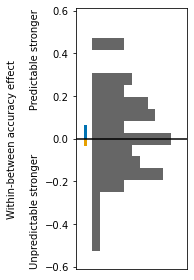

In [22]:
plt.figure(figsize=(2,4.8))
cond_diff = (exp1.clock_within-exp1.clock_between)-(exp1.noclock_within-exp1.noclock_between)
for bar in np.arange(-10,11):
    count = np.isclose(cond_diff, bar/18).sum()
    plt.gca().add_patch(Rectangle((0, bar/18-0.5/18), count, 1/18, facecolor=[0.4, 0.4, 0.4]))

conf_int = t.interval(0.95, df=len(cond_diff)-1, loc=np.mean(cond_diff), scale=sem(cond_diff))
plt.gca().add_patch(Rectangle((-1, 0), 0.4, conf_int[1], facecolor="#0072B2"))
plt.gca().add_patch(Rectangle((-1, 0), 0.4, conf_int[0], facecolor="#E6A000"))

plt.plot([-2, 12],[0,0],'k-')

plt.xlim([-2, 12])
plt.ylim([-11/18, 11/18])

plt.xticks([])
plt.ylabel('Within-between accuracy effect\n\nUnpredictable stronger              Predictable stronger')

print(conf_int)
print(np.array(conf_int)*18)

# Experiment 2a

In [27]:
exp2a = pd.read_csv('exp2a_results_withRT.csv')
exp2a = exp2a.drop(columns=['Unnamed: 0'])

exp2a_background = exp2a.loc[np.logical_not(np.isnan(exp2a["background_within"]))]
exp2a_nback = exp2a.loc[np.logical_not(np.isnan(exp2a["nback_within"]))]
# Perform 2 t-tests on accuracy

print('Background:', ttest_1samp(exp2a_background.background_within - exp2a_background.background_between, 0))
print('N Subj', len(exp2a_background.background_within - exp2a_background.background_between))

print('2-Back:', ttest_1samp(exp2a_nback.nback_within - exp2a_nback.nback_between, 0))
print('N Subj', len(exp2a_nback.nback_within - exp2a_nback.nback_between))


# Test for difference between conditions (independent samples, since these are different subjects)
print('Difference:', ttest_ind(exp2a_background.background_within - exp2a_background.background_between, exp2a_nback.nback_within - exp2a_nback.nback_between))
print('Degrees of freedom:', len(exp2a_background.background_within - exp2a_background.background_between) + len(exp2a_nback.nback_within - exp2a_nback.nback_between) - 2)

print('Conf int:')
wb = exp2a_background.background_within - exp2a_background.background_between
print('Background:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))
wb = exp2a_nback.nback_within - exp2a_nback.nback_between
print('2-Back:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))
print('Difference:', sms.CompareMeans(sms.DescrStatsW(exp2a_background.background_within - exp2a_background.background_between), sms.DescrStatsW(exp2a_nback.nback_within - exp2a_nback.nback_between)).tconfint_diff())

Background: Ttest_1sampResult(statistic=3.7467475395294896, pvalue=0.0008614809636361446)
N Subj 28
2-Back: Ttest_1sampResult(statistic=1.3858295423628346, pvalue=0.17262885174267376)
N Subj 46
Difference: Ttest_indResult(statistic=2.63075112625539, pvalue=0.010413619675292278)
Degrees of freedom: 72
Conf int:
Background: (0.0484682382662918, 0.16581747601942254)
2-Back: (-0.010950622868203443, 0.05925980161216478)
Difference: (0.020103532465149482, 0.1458730030766035)


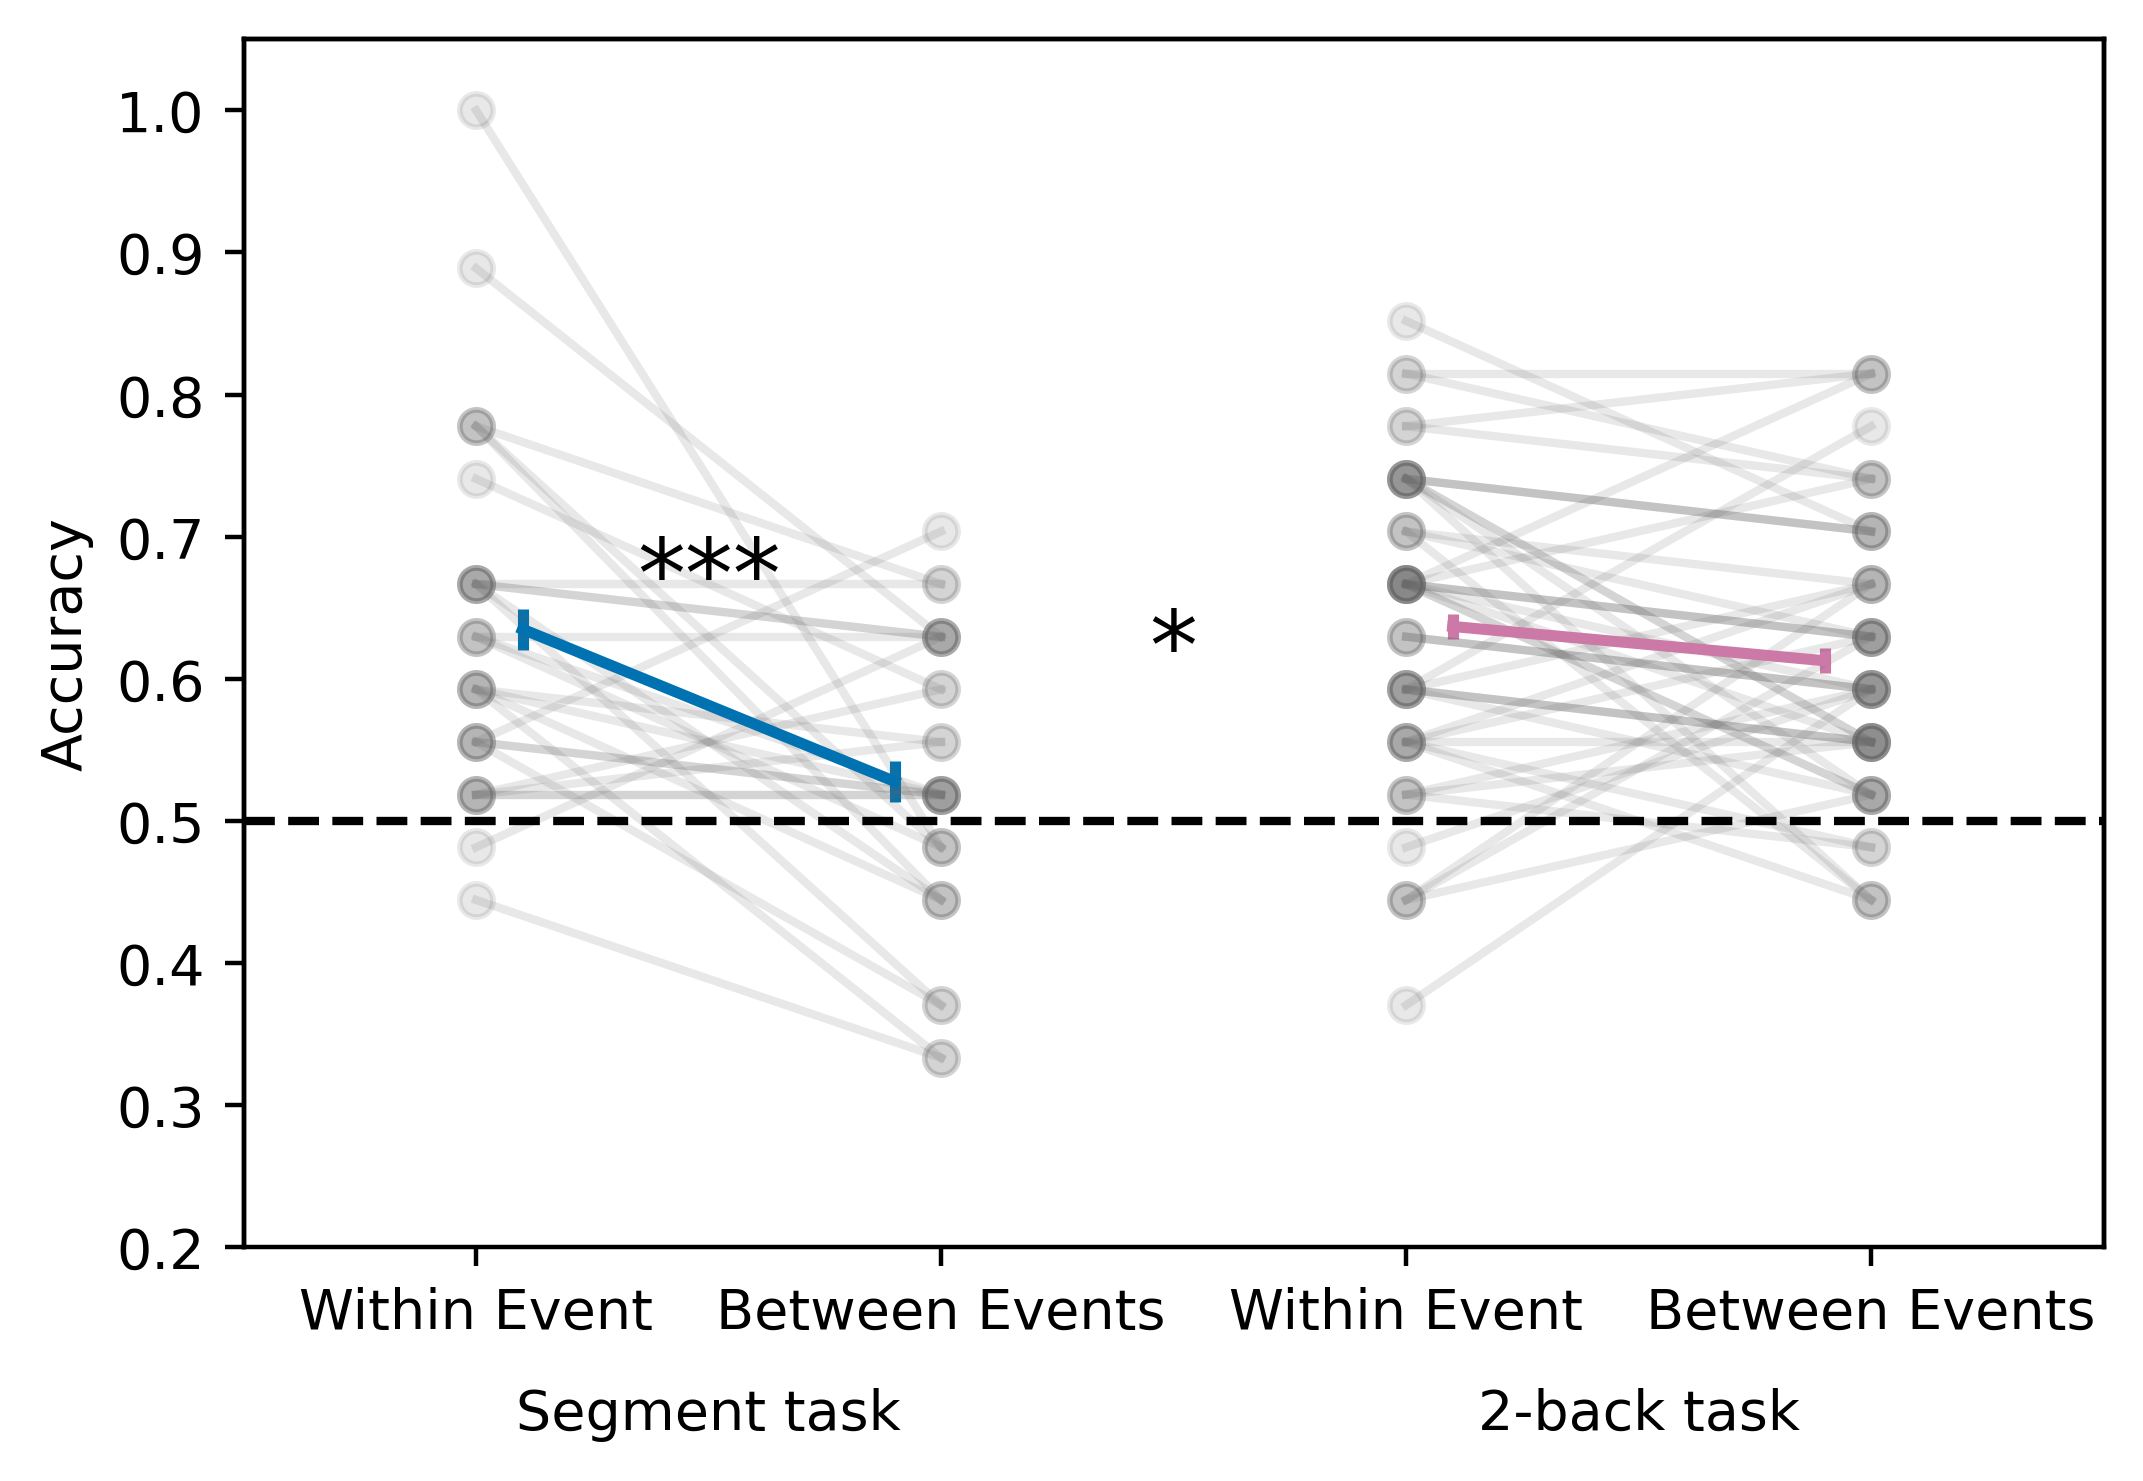

In [28]:
# Plot Exp2a subjects, with transparency=20%
plt.figure(dpi=400)
for subj in exp2a.itertuples(index=False):
    if not np.isnan(subj.background_within):
        plt.plot([0,1],[subj.background_within, subj.background_between], color=[0.4,0.4,0.4,0.15], marker='o')
    else:
        plt.plot([2,3],[subj.nback_within, subj.nback_between], color=[0.4,0.4,0.4,0.15], marker='o')

# Plot group means
plt.errorbar([0.1,0.9], [exp2a_background["background_within"].mean(), exp2a_background["background_between"].mean()], \
    within_subj_SE(exp2a_background[["background_within", "background_between"]]), color="#0072B2", lw=2)

plt.errorbar([2.1,2.9], [exp2a_nback["nback_within"].mean(), exp2a_nback["nback_between"].mean()], \
    within_subj_SE(exp2a_nback[["nback_within", "nback_between"]]), color="#CC79A7", lw=2)

plt.text(0.5,0.65,'***',size='xx-large',horizontalalignment='center')
plt.text(1.5,0.6,'*',size='xx-large',horizontalalignment='center')

# Adjust axes and labels
plt.plot([-0.5,3.5],[0.5, 0.5],'--k')
plt.xlim([-0.5,3.5])
plt.ylim([0.2,1.05])
plt.ylabel('Accuracy')
plt.xticks(np.arange(4),["Within Event", "Between Events","Within Event", "Between Events"])
ax2 = plt.gca().twiny()
ax2.spines["bottom"].set_position(("axes", -0.10))
ax2.spines["bottom"].set_visible(False)
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.set_xticks([])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.25, 0.75]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['Segment task', '2-back task']))


# Experiment 2b

In [33]:
# Load exp3 data
exp2b = pd.read_csv('exp2b_results_withRT.csv')
exp2b = exp2b.drop(columns=['Unnamed: 0'])

exp2b_background = exp2b.loc[np.logical_not(np.isnan(exp2b["background_within"]))]
exp2b_nback = exp2b.loc[np.logical_not(np.isnan(exp2b["nback_within"]))]

# Perform 2 t-tests on accuracy

print('Background:', ttest_1samp(exp2b_background.background_within - exp2b_background.background_between, 0))
print('N Subj', len(exp2b_background.background_within - exp2b_background.background_between))

print('2-Back:', ttest_1samp(exp2b_nback.nback_within - exp2b_nback.nback_between, 0))
print('N Subj', len(exp2b_nback.nback_within - exp2b_nback.nback_between))


# Test for difference between conditions (independent samples, since these are different subjects)
print('Difference:', ttest_ind(exp2b_background.background_within - exp2b_background.background_between, exp2b_nback.nback_within - exp2b_nback.nback_between))
print('Degrees of freedom:', len(exp2b_background.background_within - exp2b_background.background_between) + len(exp2b_nback.nback_within - exp2b_nback.nback_between) - 2)

print('Conf int:')
wb = exp2b_background.background_within - exp2b_background.background_between
print('Background:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))
wb = exp2b_nback.nback_within - exp2b_nback.nback_between
print('2-Back:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))

print('Difference:', sms.CompareMeans(sms.DescrStatsW(exp2b_background.background_within - exp2b_background.background_between), sms.DescrStatsW(exp2b_nback.nback_within - exp2b_nback.nback_between)).tconfint_diff())

Background: Ttest_1sampResult(statistic=4.640482663358613, pvalue=5.632463149922598e-05)
N Subj 33
2-Back: Ttest_1sampResult(statistic=-0.2241999807880673, pvalue=0.8237152273763255)
N Subj 42
Difference: Ttest_indResult(statistic=3.868911945044465, pvalue=0.00023548081261007145)
Degrees of freedom: 73
Conf int:
Background: (0.07934060278038957, 0.2034876800478933)
2-Back: (-0.05295114285335482, 0.042369132271344236)
Difference: (0.07113275326811491, 0.2222775401421785)


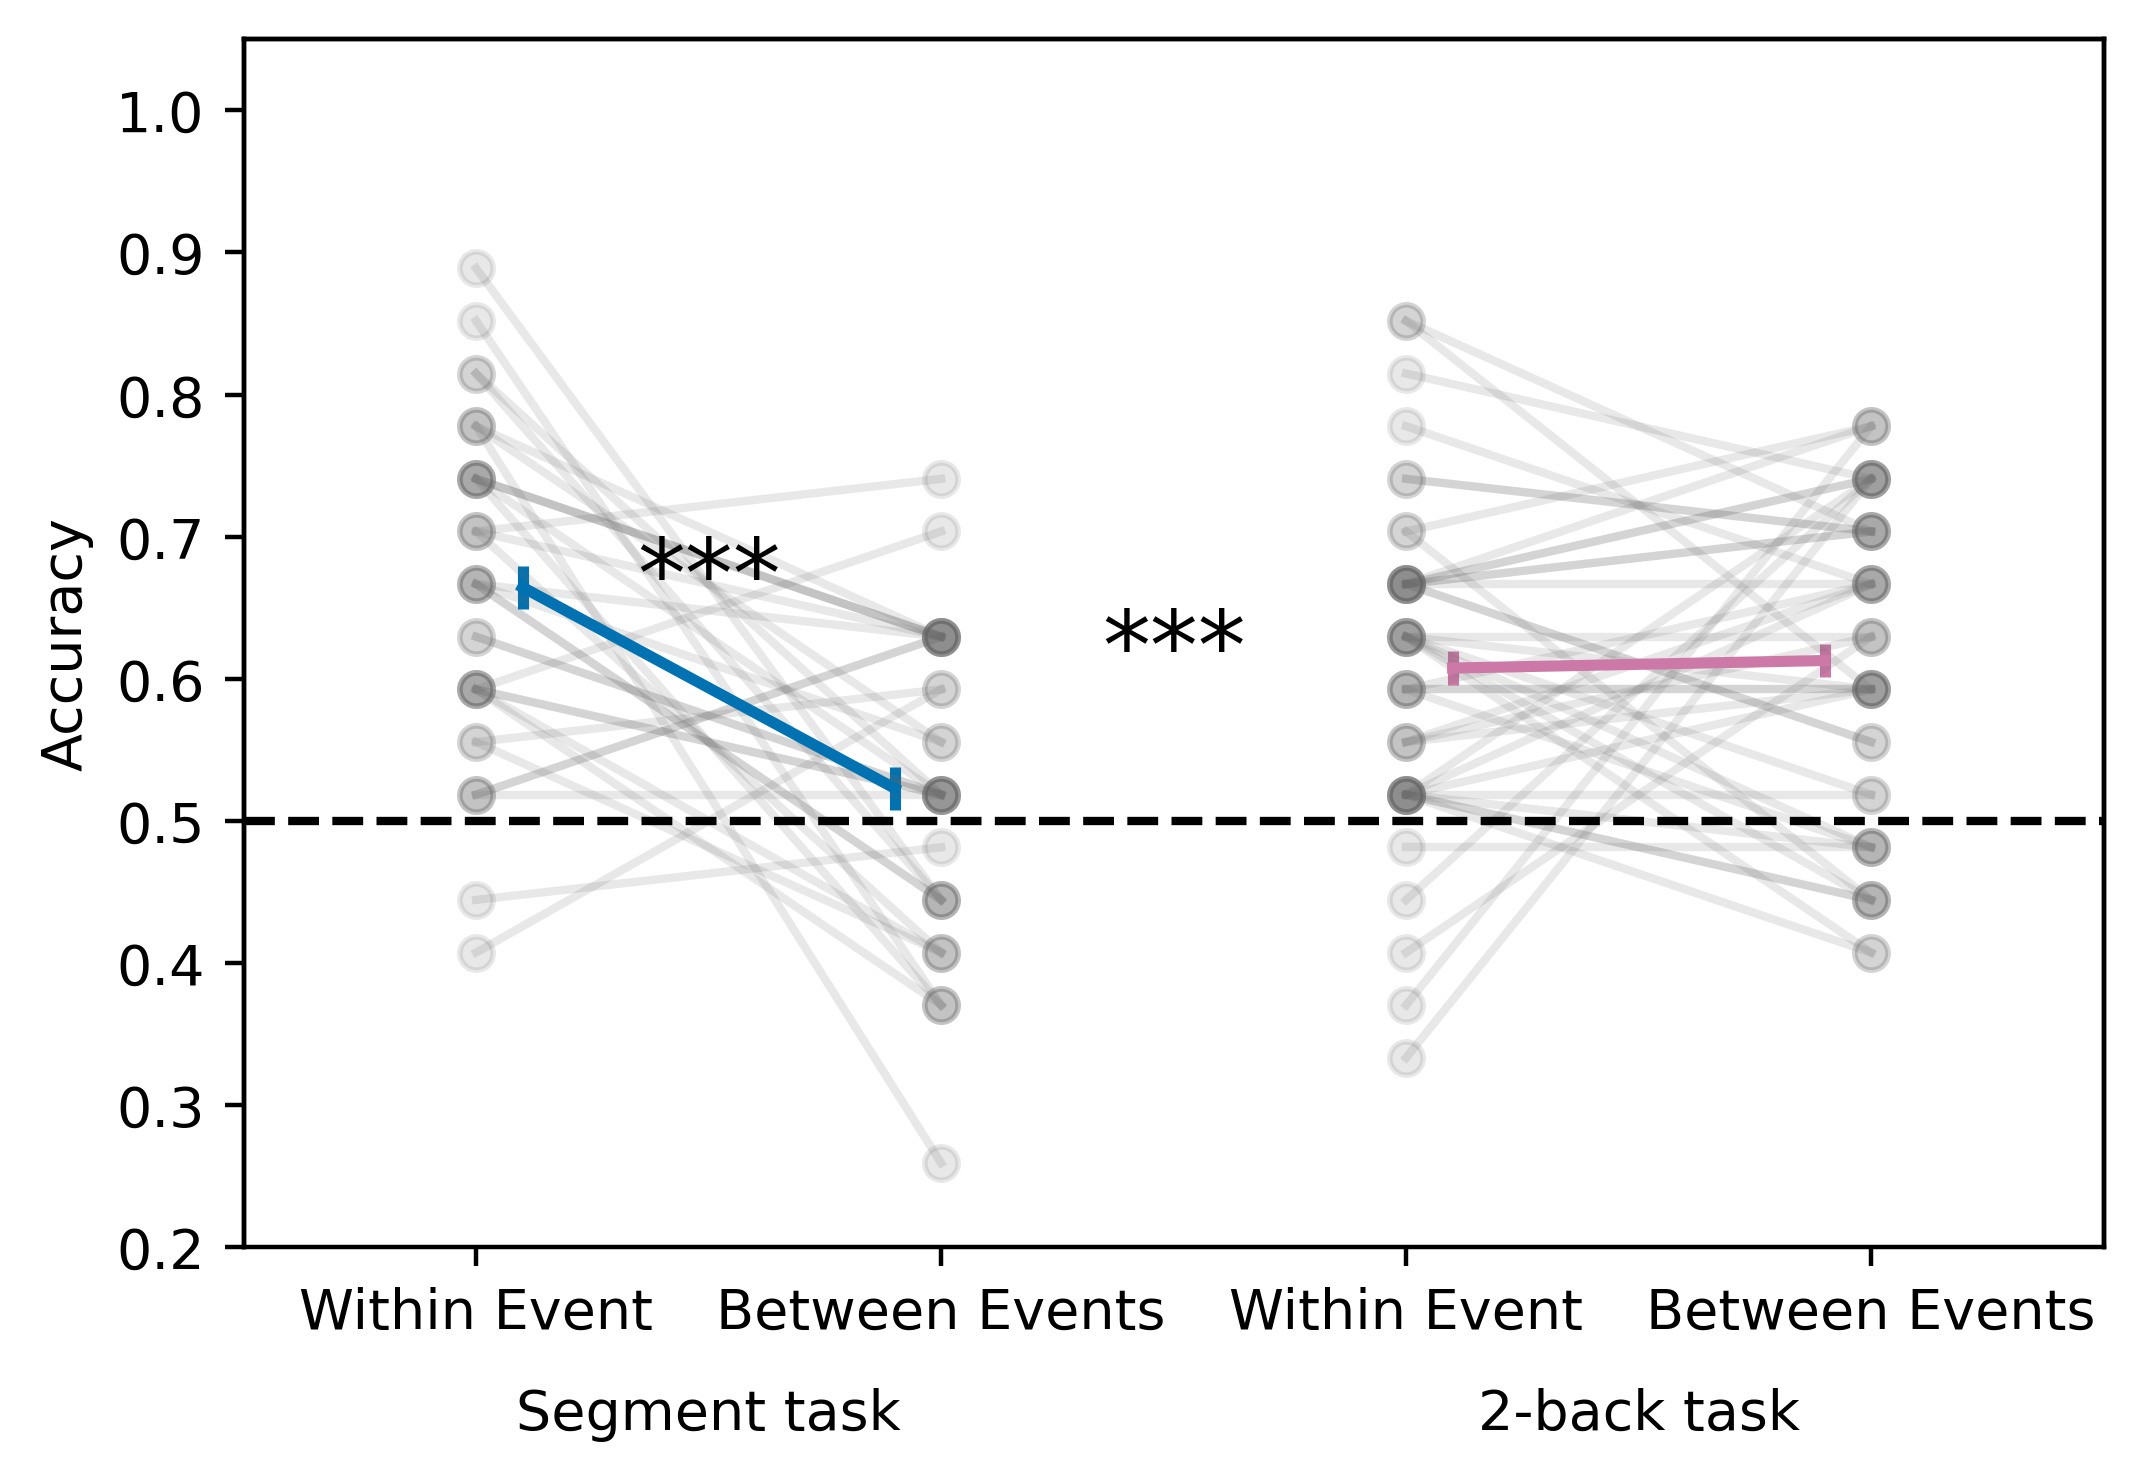

In [31]:
# Plot exp2b subjects, with transparency=20%
plt.figure(dpi=400)
for subj in exp2b.itertuples(index=False):
    if not np.isnan(subj.background_within):
        plt.plot([0,1],[subj.background_within, subj.background_between], color=[0.4,0.4,0.4,0.15], marker='o')
    else:
        plt.plot([2,3],[subj.nback_within, subj.nback_between], color=[0.4,0.4,0.4,0.15], marker='o')

# Plot group means
plt.errorbar([0.1,0.9], [exp2b_background["background_within"].mean(), exp2b_background["background_between"].mean()], \
    within_subj_SE(exp2b_background[["background_within", "background_between"]]), color="#0072B2", lw=2)
exp2b_nback = exp2b.loc[np.logical_not(np.isnan(exp2b["nback_within"]))]
plt.errorbar([2.1,2.9], [exp2b_nback["nback_within"].mean(), exp2b_nback["nback_between"].mean()], \
    within_subj_SE(exp2b_nback[["nback_within", "nback_between"]]), color="#CC79A7", lw=2)

plt.text(0.5,0.65,'***',size='xx-large',horizontalalignment='center')
plt.text(1.5,0.6,'***',size='xx-large',horizontalalignment='center')

# Adjust axes and labels
plt.plot([-0.5,3.5],[0.5, 0.5],'--k')
plt.xlim([-0.5,3.5])
plt.ylim([0.2,1.05])
plt.ylabel('Accuracy')
plt.xticks(np.arange(4),["Within Event", "Between Events","Within Event", "Between Events"])
ax2 = plt.gca().twiny()
ax2.spines["bottom"].set_position(("axes", -0.10))
ax2.spines["bottom"].set_visible(False)
ax2.tick_params('both', length=0, width=0, which='minor')
ax2.xaxis.set_ticks_position("bottom")
ax2.xaxis.set_label_position("bottom")
ax2.set_xticks([])
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator([0.25, 0.75]))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(['Segment task', '2-back task']))

# Combining Experiments 2a+2b

In [35]:
print('Accuracy, combining Exp 2a+2b:')
# Perform 2 t-tests on accuracy
back_diff = np.concatenate((exp2a_background.background_within - exp2a_background.background_between, \
    exp2b_background.background_within - exp2b_background.background_between))
nback_diff = np.concatenate((exp2a_nback.nback_within - exp2a_nback.nback_between,\
    exp2b_nback.nback_within - exp2b_nback.nback_between))
print('Background:', ttest_1samp(back_diff, 0))
print('N subj', len(back_diff))
print('2-Back:', ttest_1samp(nback_diff, 0))
print('N subj', len(nback_diff))

# Test for difference between conditions (independent samples, since these are different subjects)
print('Difference:', ttest_ind(back_diff, nback_diff))

print('Conf int:')
wb = back_diff
print('Background:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))
wb = nback_diff
print('2-Back:', t.interval(0.95, df=len(wb)-1, loc=np.mean(wb), scale=sem(wb)))

print('Difference:', sms.CompareMeans(sms.DescrStatsW(back_diff), sms.DescrStatsW(nback_diff)).tconfint_diff())


Accuracy, combining Exp 2a+2b:
Background: Ttest_1sampResult(statistic=5.980062015779506, pvalue=1.3265791293024075e-07)
N subj 61
2-Back: Ttest_1sampResult(statistic=0.6972151428759511, pvalue=0.4875271280400866)
N subj 88
Difference: Ttest_indResult(statistic=4.68479844741448, pvalue=6.325628092282477e-06)
Conf int:
Background: (0.08364276845057914, 0.1677233517680001)
2-Back: (-0.018694766257012396, 0.03889678645903259)
Difference: (0.06682496905817194, 0.1643391309583871)
